In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
#Data Aquisition,Exporatory data analysis

In [3]:
data = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=["Message_Category", "Message"])

In [4]:
data.head(10)

,Message_Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
data.groupby('Message_Category').describe()

Message         \
                   count unique   
Message_Category                  
ham                 4825   4516   
spam                 747    653   

                                                                          
                                                                top freq  
Message_Category                                                          
ham                                          Sorry, I'll call later   30  
spam              Please call our customer service representativ...    4

In [6]:
data['Message_length'] = data['Message'].apply(len)
data.head()

,Message_Category,Message,Message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
data['Message_length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Message_length, dtype: float64

In [8]:
data[data['Message_length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

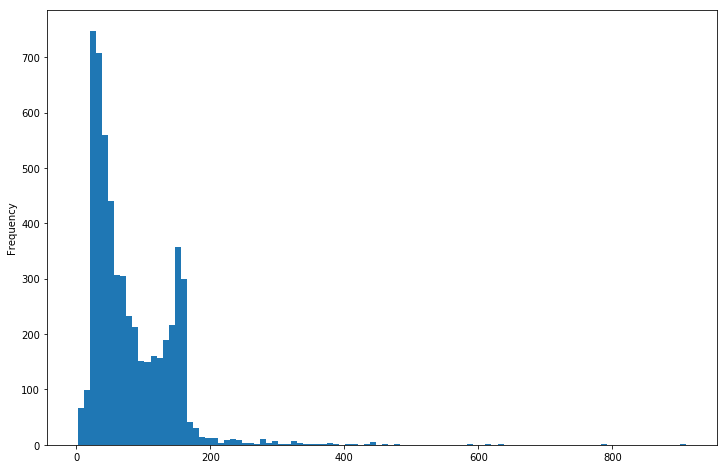

In [9]:
data['Message_length'].plot(bins=100, kind='hist',figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000145B6FD0>,
      dtype=object)

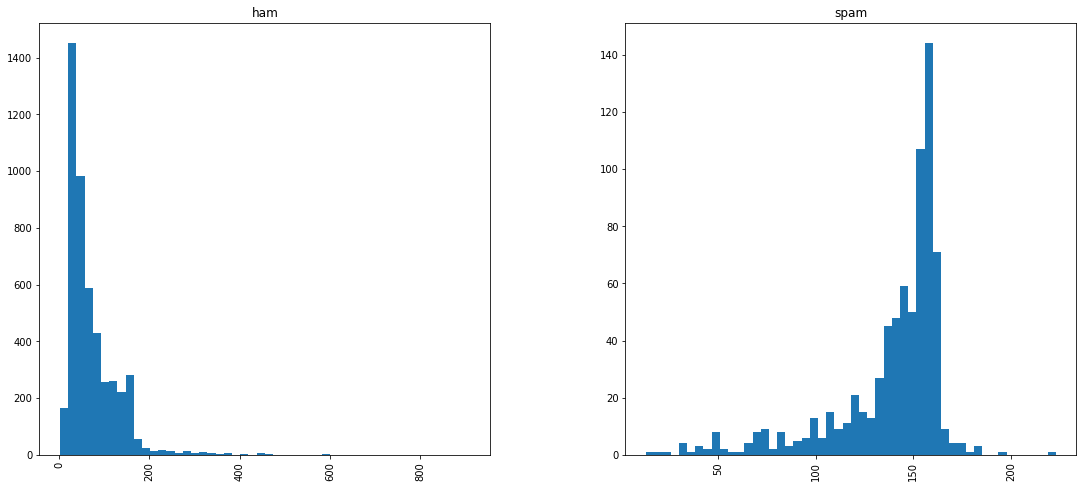

In [10]:
data.hist(column='Message_length', by='Message_Category', bins=50,figsize=(18,8))

In [11]:
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [12]:
#preprocessing data

In [14]:


def preprocess_data(Message):
    
    stemmer=nltk.PorterStemmer()
    no_symbols=[]
    
    for char in Message:
        if char not in string.punctuation:
            no_symbols.append(char)
            
    no_symbols = ''.join(no_symbols)
    
    processed_data=[]
    for word in no_symbols.split():
        lowercase_stemmed_word = stemmer.stem(word.lower())
        if lowercase_stemmed_word not in stop_words:
            processed_data.append(lowercase_stemmed_word)
    
    clean_data = ' '.join(processed_data)
    return clean_data


In [15]:
data["Preprocessed_Message"] = data["Message"].apply(preprocess_data)

In [16]:
data.head()

,Message_Category,Message,Message_length,Preprocessed_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail onli bugi n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goe usf live around though


In [17]:
#splitting data set

In [18]:
Message_train, Message_test, Message_Category_train, Message_Category_test = train_test_split(data["Preprocessed_Message"], data["Message_Category"], test_size=0.3,random_state=101)

print('Number of trained data:'+ str(len(Message_train)))
print('Number of test data:'+str(len(Message_test)))
print('Total Number of Messages:'+str( len(Message_train) + len(Message_test)))

Number of trained data:3900
Number of test data:1672
Total Number of Messages:5572


In [19]:
#Building bag of words model

In [20]:

count_vect = CountVectorizer(min_df=2,ngram_range=(1,3))

Message_Train_counts = count_vect.fit_transform(Message_train)


In [21]:
Message_Test_counts = count_vect.transform(Message_test)


In [22]:
print('Dimensions: ', Message_Test_counts.shape)
print('Non-Zero occurences: ', Message_Test_counts.nnz)

Dimensions:  (1672, 9779)
Non-Zero occurences:  15166


In [23]:
tfidf_transformer = TfidfTransformer()
Message_Train_tfidf = tfidf_transformer.fit_transform(Message_Train_counts)

In [24]:
Message_Test_tfidf = tfidf_transformer.transform(Message_Test_counts)

In [25]:
print(Message_Train_tfidf.toarray())
print(Message_Train_tfidf.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3900, 9779)


In [26]:
print(Message_Test_tfidf.toarray())
print(Message_Test_tfidf.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1672, 9779)


In [27]:
Spam_Ham_Predictions={}

In [28]:
#Building Decision Tree model 

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_leaf_nodes=2, random_state=101)
decision_tree_model.fit(Message_Train_tfidf,Message_Category_train)
Spam_Ham_Predictions['Decision tree'] = decision_tree_model.predict(Message_Test_tfidf)
print("Decision Tree Accuracy : {}".format(decision_tree_model.score(Message_Test_tfidf , Message_Category_test)))



Decision Tree Accuracy : 0.8809808612440191


In [30]:
#Building Logistic regression model 

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(Message_Train_tfidf,Message_Category_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
Spam_Ham_Predictions['Logistic regression'] = logistic_regression_model.predict(Message_Test_tfidf)
print("Logistic regression Accuracy : {}".format(logistic_regression_model.score(Message_Test_tfidf , Message_Category_test)))


Logistic regression Accuracy : 0.9539473684210527


In [33]:
#Generating model report

In [34]:
keys = Spam_Ham_Predictions.keys()
for key in keys:
    print(" {}:".format(key))
    print(metrics.classification_report(Message_Category_test, Spam_Ham_Predictions.get(key), target_names = ["spam", "ham"]))
    print("\n")

 Decision tree:
             precision    recall  f1-score   support

       spam       0.92      0.94      0.93      1475
        ham       0.49      0.42      0.45       197

avg / total       0.87      0.88      0.88      1672



 Logistic regression:
             precision    recall  f1-score   support

       spam       0.95      1.00      0.97      1475
        ham       0.98      0.62      0.76       197

avg / total       0.96      0.95      0.95      1672





In [35]:
#Predicting results for New Data

In [36]:
new_data = pd.read_csv('smsspamcollection/NewFile.txt', sep='\t',names=["Message"])

In [37]:
new_data.head()

,Message
0,Final Chance! Claim ur £150 worth of discount ...
1,PRIVATE! Your 2004 Account Statement for 07742...
2,"SMS SERVICES. for your inclusive text credits,..."
3,Going to take your babe out ?
4,Hai ana tomarrow am coming on morning. &lt;DE...


In [38]:
new_data["Preprocessed_Message"] = new_data["Message"].apply(preprocess_data)

In [39]:
new_data.head()

,Message,Preprocessed_Message
0,Final Chance! Claim ur £150 worth of discount ...,final chanc claim ur £150 worth discount vouch...
1,PRIVATE! Your 2004 Account Statement for 07742...,privat 2004 account statement 07742676969 show...
2,"SMS SERVICES. for your inclusive text credits,...",sm servic inclus text credit pl goto wwwcomukn...
3,Going to take your babe out ?,go take babe
4,Hai ana tomarrow am coming on morning. &lt;DE...,hai ana tomarrow come morn ltdecimalgt ill sat...


In [40]:
New_Messages_counts = count_vect.transform(new_data["Preprocessed_Message"])
New_Messages_tfidf = tfidf_transformer.transform(New_Messages_counts)

In [41]:
print(New_Messages_tfidf.toarray())
print(New_Messages_tfidf.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(77, 9779)


In [42]:
new_data["Decision Tree"] = decision_tree_model.predict(New_Messages_tfidf)

In [43]:
new_data.head()

,Message,Preprocessed_Message,Decision Tree
0,Final Chance! Claim ur £150 worth of discount ...,final chanc claim ur £150 worth discount vouch...,ham
1,PRIVATE! Your 2004 Account Statement for 07742...,privat 2004 account statement 07742676969 show...,spam
2,"SMS SERVICES. for your inclusive text credits,...",sm servic inclus text credit pl goto wwwcomukn...,ham
3,Going to take your babe out ?,go take babe,ham
4,Hai ana tomarrow am coming on morning. &lt;DE...,hai ana tomarrow come morn ltdecimalgt ill sat...,ham


In [44]:
new_data["Logistic Regression"] = logistic_regression_model.predict(New_Messages_tfidf)

In [45]:
new_data.head()

,Message,Preprocessed_Message,Decision Tree,Logistic Regression
0,Final Chance! Claim ur £150 worth of discount ...,final chanc claim ur £150 worth discount vouch...,ham,spam
1,PRIVATE! Your 2004 Account Statement for 07742...,privat 2004 account statement 07742676969 show...,spam,spam
2,"SMS SERVICES. for your inclusive text credits,...",sm servic inclus text credit pl goto wwwcomukn...,ham,spam
3,Going to take your babe out ?,go take babe,ham,ham
4,Hai ana tomarrow am coming on morning. &lt;DE...,hai ana tomarrow come morn ltdecimalgt ill sat...,ham,ham


In [46]:
filename = "New_data_predictions.csv"
new_data.to_csv(filename,index=False)